#1.What is Boosting in Machine Learning? Explain how it improves weak learners.

- Boosting is an ensemble learning technique that combines multiple weak learners to form a strong model. Weak learners are models that perform only slightly better than random guessing.

- Boosting works by training models sequentially. Each new model focuses more on the data points that were misclassified by previous models. These difficult samples are given higher importance, so future learners try to correct earlier mistakes. Finally, all weak learners are combined using a weighted method to produce the final prediction.

- Thus, boosting improves weak learners by learning from errors and progressively increasing accuracy.

#2.What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?


- AdaBoost trains models by re-weighting data points. Misclassified samples are given higher weights so that the next weak learner focuses more on those difficult cases.

- Gradient Boosting trains models by fitting each new model to the residual errors of the previous model using a loss function. Instead of changing sample weights, it learns in the direction that minimizes the overall error.

#3. How does regularization help in XGBoost?
- In XGBoost, regularization helps prevent overfitting by controlling model complexity. It adds penalty terms to the loss function that limit how complex the trees can become. L1 regularization (alpha) encourages simpler models by reducing unnecessary leaf weights, while L2 regularization (lambda) penalizes large weights to keep predictions stable. XGBoost also uses tree-specific regularization such as limiting tree depth and minimum loss reduction for splits, which helps improve generalization.

#4.Why is CatBoost considered efficient for handling categorical data?
- CatBoost is considered efficient for handlinyg categorical data because it can use categorical features directly without manual encoding. It applies target-based encoding in an ordered way, which prevents data leakage and overfitting. CatBoost also automatically handles feature combinations and uses ordered boosting, making training more stable and accurate when categorical variables are present.

#5.What are some real-world applications where boosting techniques are
preferred over bagging methods?
-
- Fraud detection – Boosting focuses on hard-to-detect fraudulent cases that are often misclassified.

- Credit scoring & loan approval – Improves accuracy by learning from borderline and error-prone cases.

- Customer churn prediction – Boosting captures complex patterns in customer behavior.

-   Search ranking & recommendation systems - Boosting models optimize ranking errors effectively.

- Medical diagnosis – Helps identify rare or difficult cases by emphasizing previous mistakes.

+ Competitions (Kaggle) – Algorithms like XGBoost and CatBoost usually outperform bagging methods.

#6.Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy

In [1]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

AdaBoost Model Accuracy: 0.9736842105263158


#7.Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.7756446042829697


# 8.Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset● Tune the learning rate using GridSearchCV ● Print the best parameters and accurac

In [4]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.956140350877193


#9. Write a Python program to:● Train a CatBoost Classifier● Plot the confusion matrix using seaborn

Accuracy: 0.9736842105263158


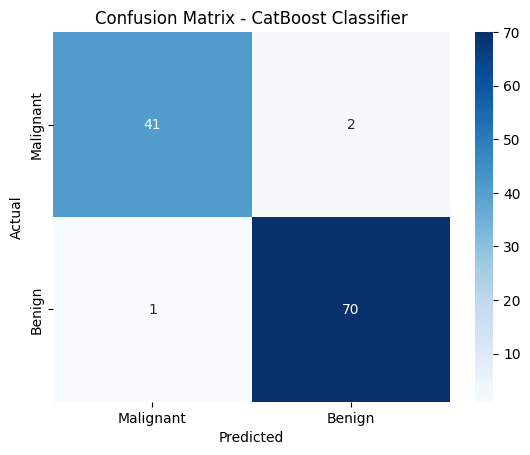

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=False
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Malignant", "Benign"],
    yticklabels=["Malignant", "Benign"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

#10.You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:● Data preprocessing & handling missing/categorical values● Choice between AdaBoost, XGBoost, or CatBoost● Hyperparameter tuning strategy● Evaluation metrics you'd choose and why● How the business would benefit from your model


- To predict loan default in a FinTech setting, the first step is data preprocessing. Missing values in numerical features can be handled using median imputation, while categorical features can be filled with a separate “Unknown” category. Numerical features may be scaled if required, and categorical variables can be encoded using target or one-hot encoding. Since the dataset is imbalanced, techniques such as class weighting or SMOTE can be used to ensure the model does not favor the majority class.

- For the model choice, boosting techniques are preferred because they focus on correcting previous errors. Among AdaBoost, XGBoost, and CatBoost, CatBoost is a strong choice because it natively handles categorical features, works well with missing values, and performs effectively on imbalanced datasets. XGBoost is also a good option when the data is mostly numeric and requires fine-grained control over regularization.

- Hyperparameter tuning can be done using GridSearchCV or RandomizedSearchCV, focusing on parameters such as learning rate, number of estimators, and tree depth. Cross-validation is used to ensure the model generalizes well and avoids overfitting.

- For evaluation, accuracy alone is not sufficient due to class imbalance. Metrics such as precision, recall, F1-score, and ROC-AUC are more appropriate. Recall is especially important because missing a defaulting customer is more costly than falsely flagging a safe one.

- From a business perspective, this model helps reduce financial losses by identifying high-risk borrowers early, improves loan approval decisions, and supports regulatory compliance through consistent and data-driven risk assessment. Overall, boosting models enable more reliable and profitable credit risk management.